### Programming assignment to build a multiple linear regression model for the prediction of demand for shared bikes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Reading csv and loading as data frame
bikes_demand_df = pd.read_csv('day.csv')

## Step 1. Data Inspection

In [3]:
bikes_demand_df.shape

(730, 16)

In [4]:
#looking if there are any headers
bikes_demand_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [5]:
#looking if there are any footers
bikes_demand_df.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,1,1,12,0,6,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,1,1,12,0,0,0,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,1,1,12,0,1,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,1,1,12,1,2,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,1,1,12,0,3,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
#checking percentage of missing values in data frame
100 * bikes_demand_df.isna().sum() / len(bikes_demand_df)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
#checking for duplicate values
len(bikes_demand_df[bikes_demand_df.duplicated()])

0

In [8]:
bikes_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
# There is only one object types; let's check all the values
bikes_demand_df['dteday'].value_counts('')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64

#### <font color='green'> Observations after preliminary data inspection </font>
- There are 730 rows and 16 columns
- There are no headers and footers available in data
- There are no missing values
- There are 0 duplicates
- There are no null values
- <b><font color='aqua'> instant column is only used for marking record number and will not have any impact on data. We will drop instant column</b>
- <b> <font color='aqua'> dteday column is having all distinct values. Also, month and year are sperately present in data. We will drop dteday column as it will not provide any additional information </b>
- <b> <font color='aqua'> cnt column values are summation of casual and registered column values. casual and registered columns will not have any impact on model building and they can be dropped. </b>

In [10]:
#dropping instant, casual and registered columns
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']
bikes_demand_df = bikes_demand_df.drop(columns_to_drop, axis=1)

#### As per data dictionary, some columns namely season, year, mnth, holiday, weekday, workingday, weathersit are encoded. 
#### We will transform few columns with original values for better understanding of EDA. It will also help up to get dummy columns later if required
#### We will transform season, mnth, weekday and weathersit columns. Other aforementioned columns are binary in nature and do not need transformation

In [11]:
feature_wise_unique_values = bikes_demand_df.nunique()
feature_wise_unique_values

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [12]:
bikes_demand_df['weekday'].value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [13]:
#transforming season, mnth, weekday and weathersit
bikes_demand_df['season'] = bikes_demand_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

bikes_demand_df['mnth'] = bikes_demand_df['mnth'].map({1:'JAN', 2:'FEB', 3:'MAR', 4:'APR', 5:'MAY', 6:'JUN', 7:'JUL', 8:'AUG', 9:'SEP', 10:'OCT', 11:'NOV', 12:'DEC'})

bikes_demand_df['weekday'] = bikes_demand_df['weekday'].map({0:'SUN', 1:'MON', 2:'TUE', 3:'WED', 4:'THU', 5:'FRI', 6:'SAT'})

bikes_demand_df['weathersit'] = bikes_demand_df['weathersit'].map({1:'Clear or Partly Cloudy', 2:'Misty and Cloudy', 3:'Light Snow or Rain', 4:'Heavy Rain or Snow'})

bikes_demand_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,JAN,0,SAT,0,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,JAN,0,SUN,0,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,JAN,0,MON,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,JAN,0,TUE,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,JAN,0,WED,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,JAN,0,THU,1,Clear or Partly Cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,JAN,0,FRI,1,Misty and Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,JAN,0,SAT,0,Misty and Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,JAN,0,SUN,0,Clear or Partly Cloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,JAN,0,MON,1,Clear or Partly Cloudy,6.184153,7.54440,48.2917,14.958889,1321


In [14]:
bikes_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [15]:
bikes_demand_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### Observations after transforming columns and describing the data
- There are 8 numerical and 4 object columns now
- As per data dictionary yr, holiday and workingday columns are having encoded values. Same can be confirmed via describe output. These are binary columns with value 0 and 1
- There are mainly 5 numerical value columns; temp, atemp, hum, windspeed and cnt   

## Step 2. Exploratory Data Analysis

In [16]:
#creating two lists of categroical and numerical (having continous values) columns
numerical_columns_in_data = [i for i in bikes_demand_df.select_dtypes(exclude= 'object').columns if bikes_demand_df[i].nunique() > 2 ] 
categroical_columns_in_data = [i for i in bikes_demand_df.columns if i not in numerical_columns_in_data]

### 2.1 Univariate Analysis

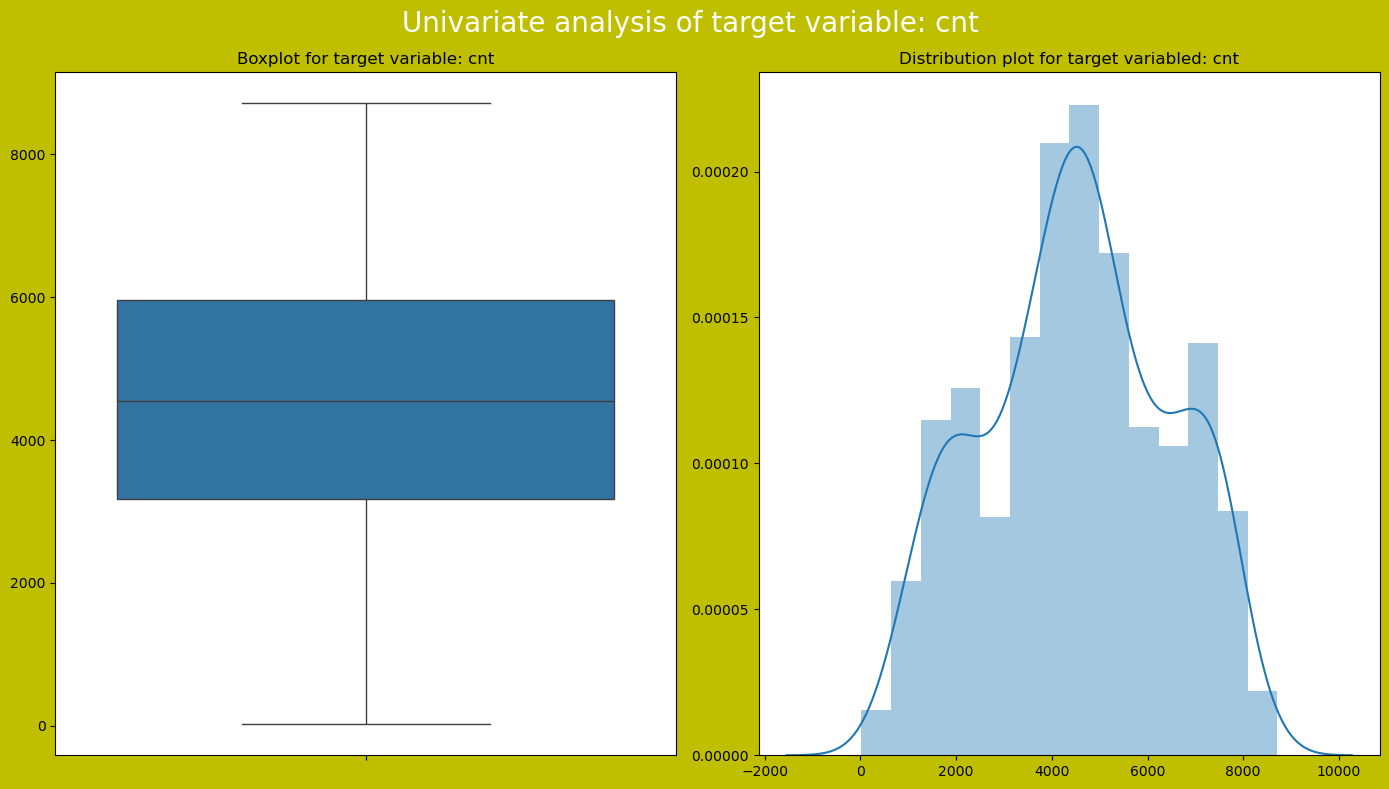

In [17]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize=(14, 8), facecolor='y')
fig.suptitle('Univariate analysis of target variable: cnt ', fontsize=20, color='w')

#Creating Boxplot for 'cnt'
sns.boxplot(y=bikes_demand_df['cnt'], ax=ax[0])
ax[0].set_title('Boxplot for target variable: cnt', fontsize=12)
ax[0].set_xlabel('')
ax[0].set_ylabel('')

#Creating Distplot for 'cnt' 
sns.distplot(bikes_demand_df['cnt'], ax=ax[1], kde=True, hist=True)
ax[1].set_title('Distribution plot for target variabled: cnt', fontsize=12)
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

#### <font color='green'> Observations for target variables </font>
- 25% values of target variable are below 3000. 75% values of it are under 6000. The median seems to be around 4500. IQR is also around 3000.
- Target variable shows an almost notmal distribtution of values with 2 distinct plateus at both sides

In [18]:
#removing cnt from numerical_columns_in_data list as it is studied separately
numerical_columns_in_data.remove('cnt')
numerical_columns_in_data

['temp', 'atemp', 'hum', 'windspeed']

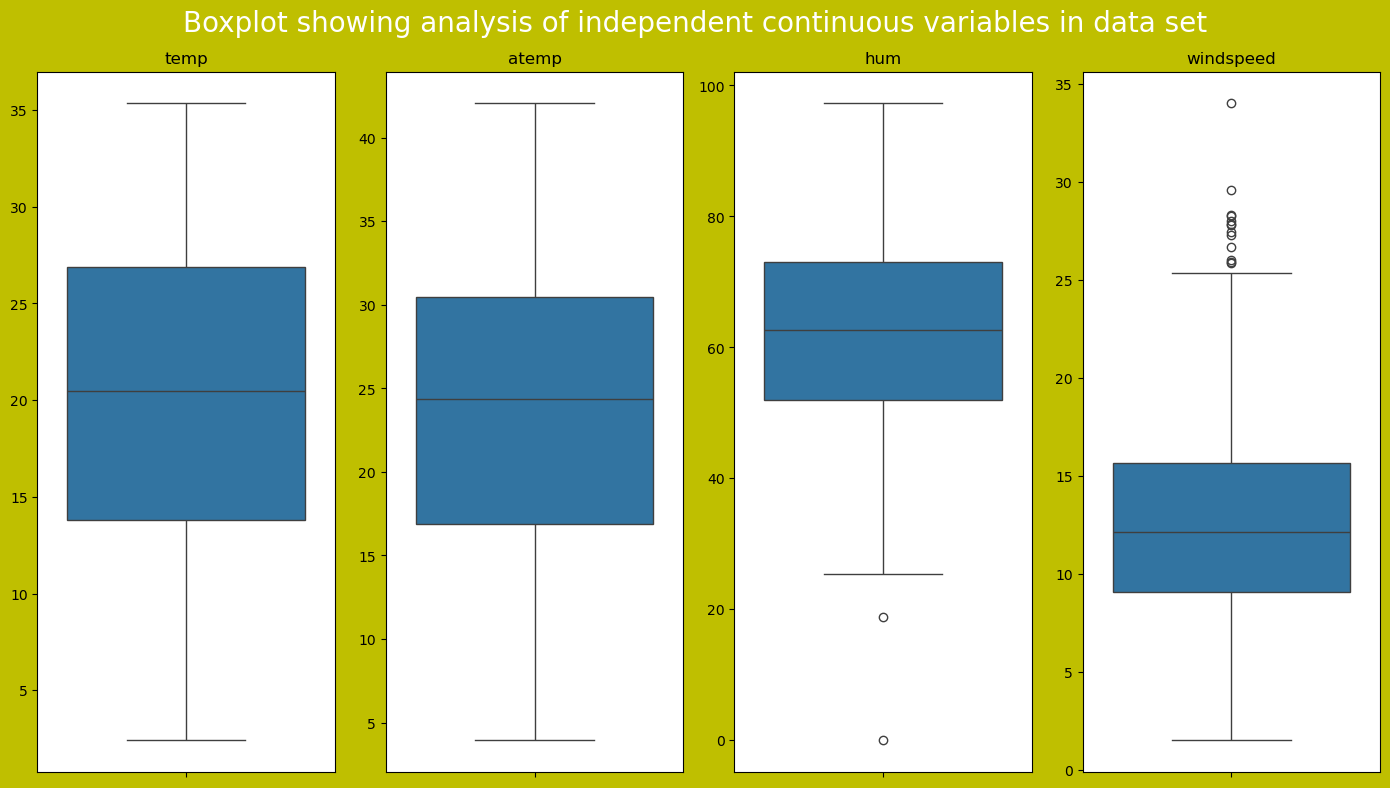

In [19]:
fig, ax = plt.subplots(nrows= 1, ncols = len(numerical_columns_in_data), figsize=(14, 8), facecolor='y')

fig.suptitle('Boxplot showing analysis of independent continuous variables in data set', fontsize=20, color='w')

#Creating Boxplot for each column
for i in range(len(numerical_columns_in_data)):
    sns.boxplot(y=bikes_demand_df[numerical_columns_in_data[i]], ax=ax[i])
    ax[i].set_title(numerical_columns_in_data[i], fontsize=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### <font color='green'> Observation for independent variables from Boxplot </font>
- Outliers are displayed for windspeed and hum columns
- temp median value is around 21
- atemp median value is aroud 24

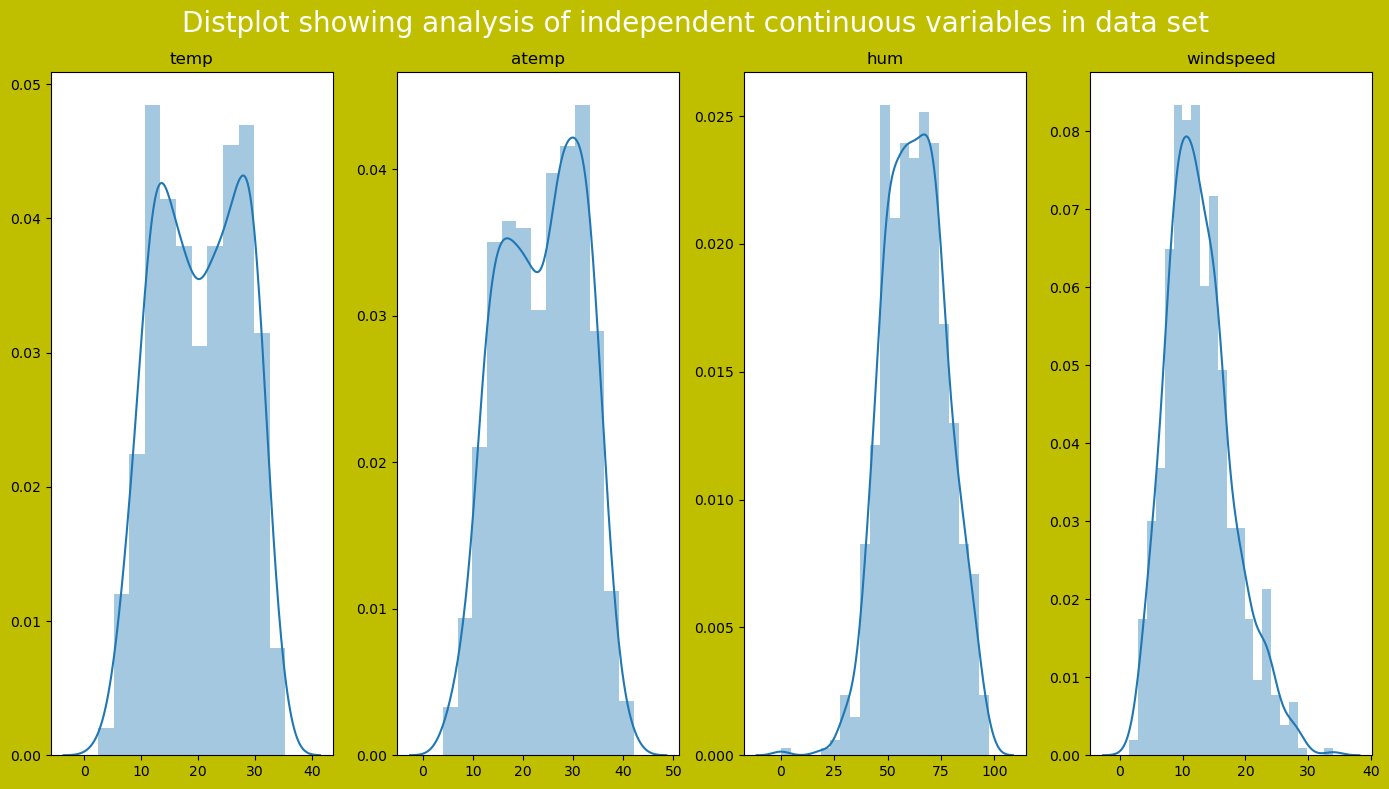

In [20]:
fig, ax = plt.subplots(nrows= 1, ncols = len(numerical_columns_in_data), figsize=(14, 8), facecolor='y')

fig.suptitle('Distplot showing analysis of independent continuous variables in data set', fontsize=20, color='w')

#Creating Distplot for each column
for i in range(len(numerical_columns_in_data)):
    sns.distplot(bikes_demand_df[numerical_columns_in_data[i]], ax=ax[i], kde=True, hist=True)
    ax[i].set_title(numerical_columns_in_data[i], fontsize=12)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### <font color='green'> Observation for independent variables from Distplot </font> 
- temp and atemp are having plateaus
- humidity and windspeed are skewed

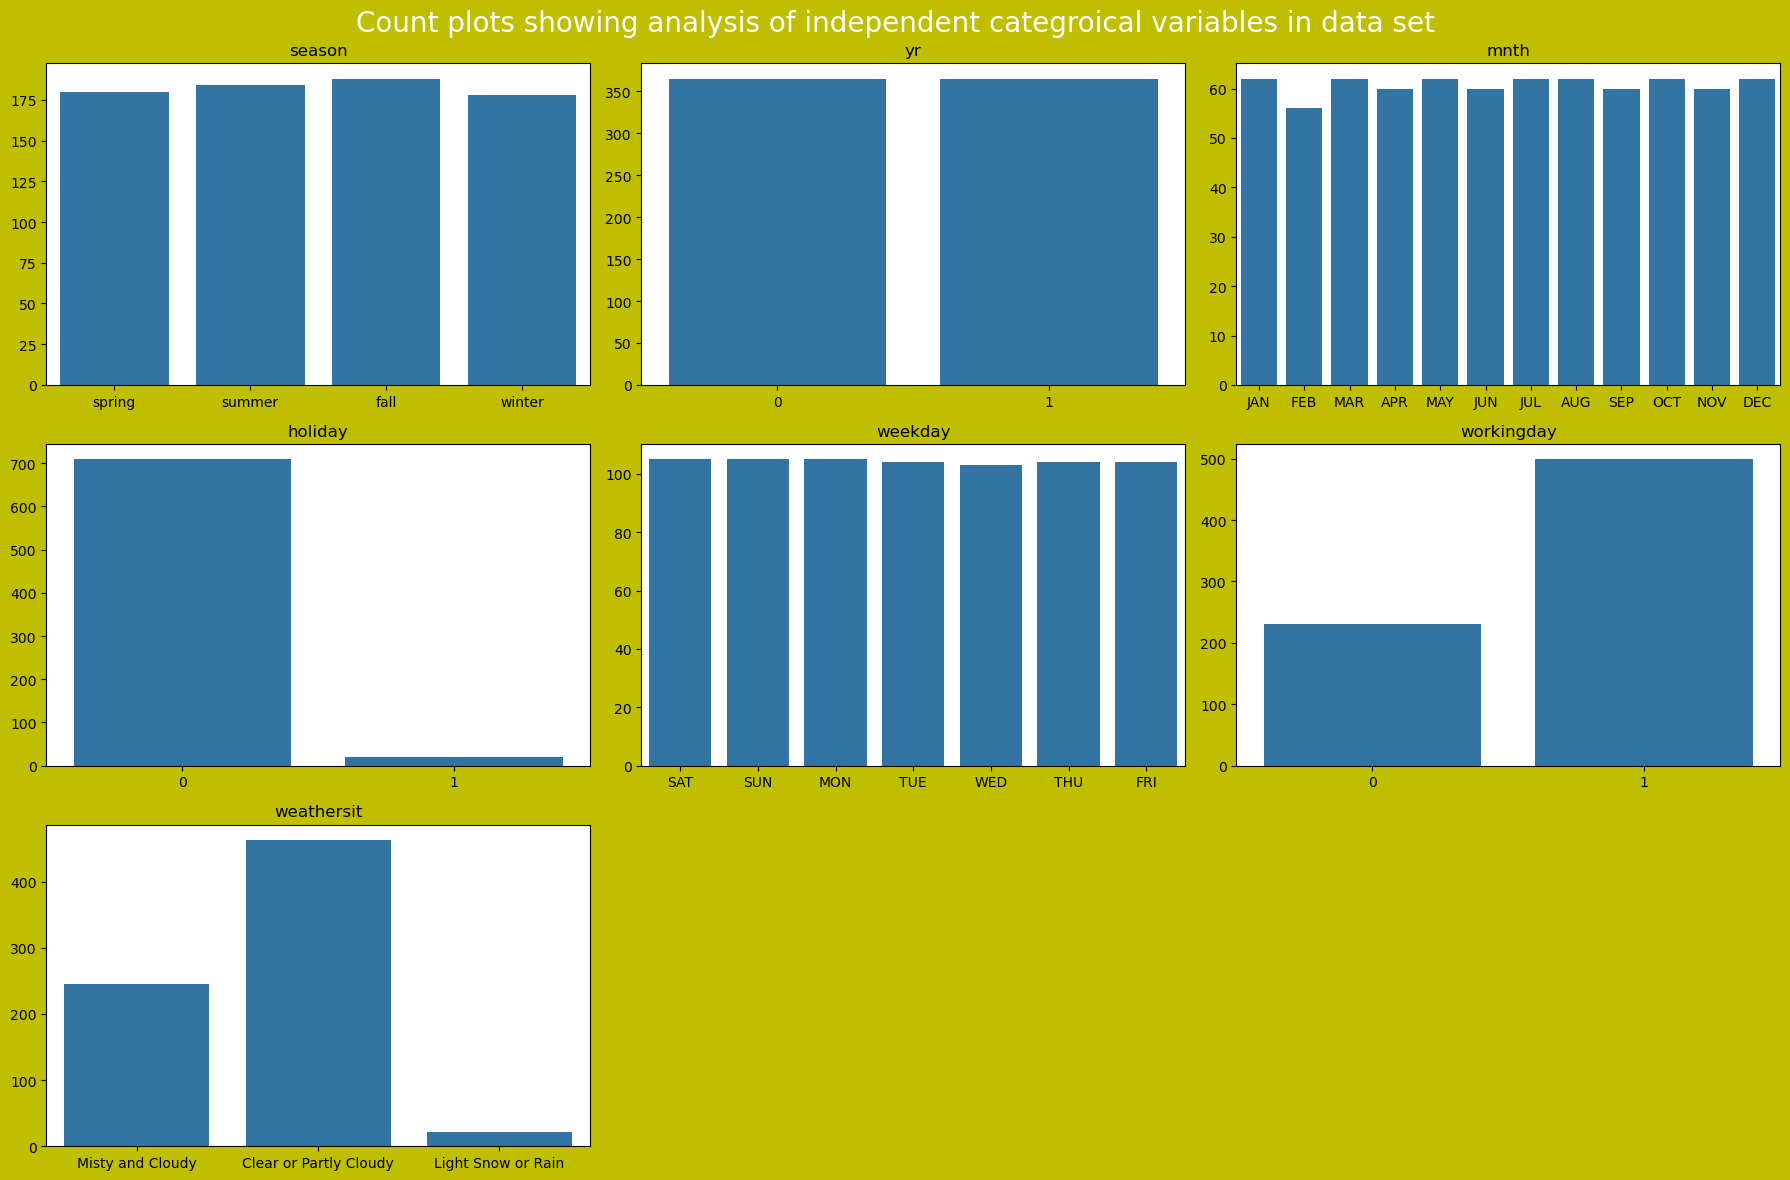

In [21]:
subplot_rows = 3
subplot_cols = int(len(categroical_columns_in_data)/2)
fig, ax = plt.subplots(nrows= subplot_rows, ncols = subplot_cols, figsize=(18, 12), facecolor='y')

fig.suptitle('Count plots showing analysis of independent categroical variables in data set', fontsize=20, color='w')

#Creating countplot for each column
k=0
for i in range(subplot_rows):
    for j in range(subplot_cols):
        if i==2 and j>0:
            plt.delaxes(ax[i,j])
        else:
            sns.countplot(bikes_demand_df, x=categroical_columns_in_data[k], ax=ax[i,j])
            ax[i,j].set_title(categroical_columns_in_data[k], fontsize=12)
            ax[i,j].set_xlabel('')
            ax[i,j].set_ylabel('')
            if k < len(categroical_columns_in_data)-1:
                k+=1
    

plt.tight_layout()
plt.show()

#### <font color='green'> Observation from countplots of categorical independent variables</font> 
- Data is from only two years i.e. 2018 and 2019
- All weekdays have similar counts
- There is gap between the values of holiday
- There is gap between the values of workingdat
- Most of the time recorded weather situations was Clear or Partly Cloudy

### 2.2 Bivariate Analysis

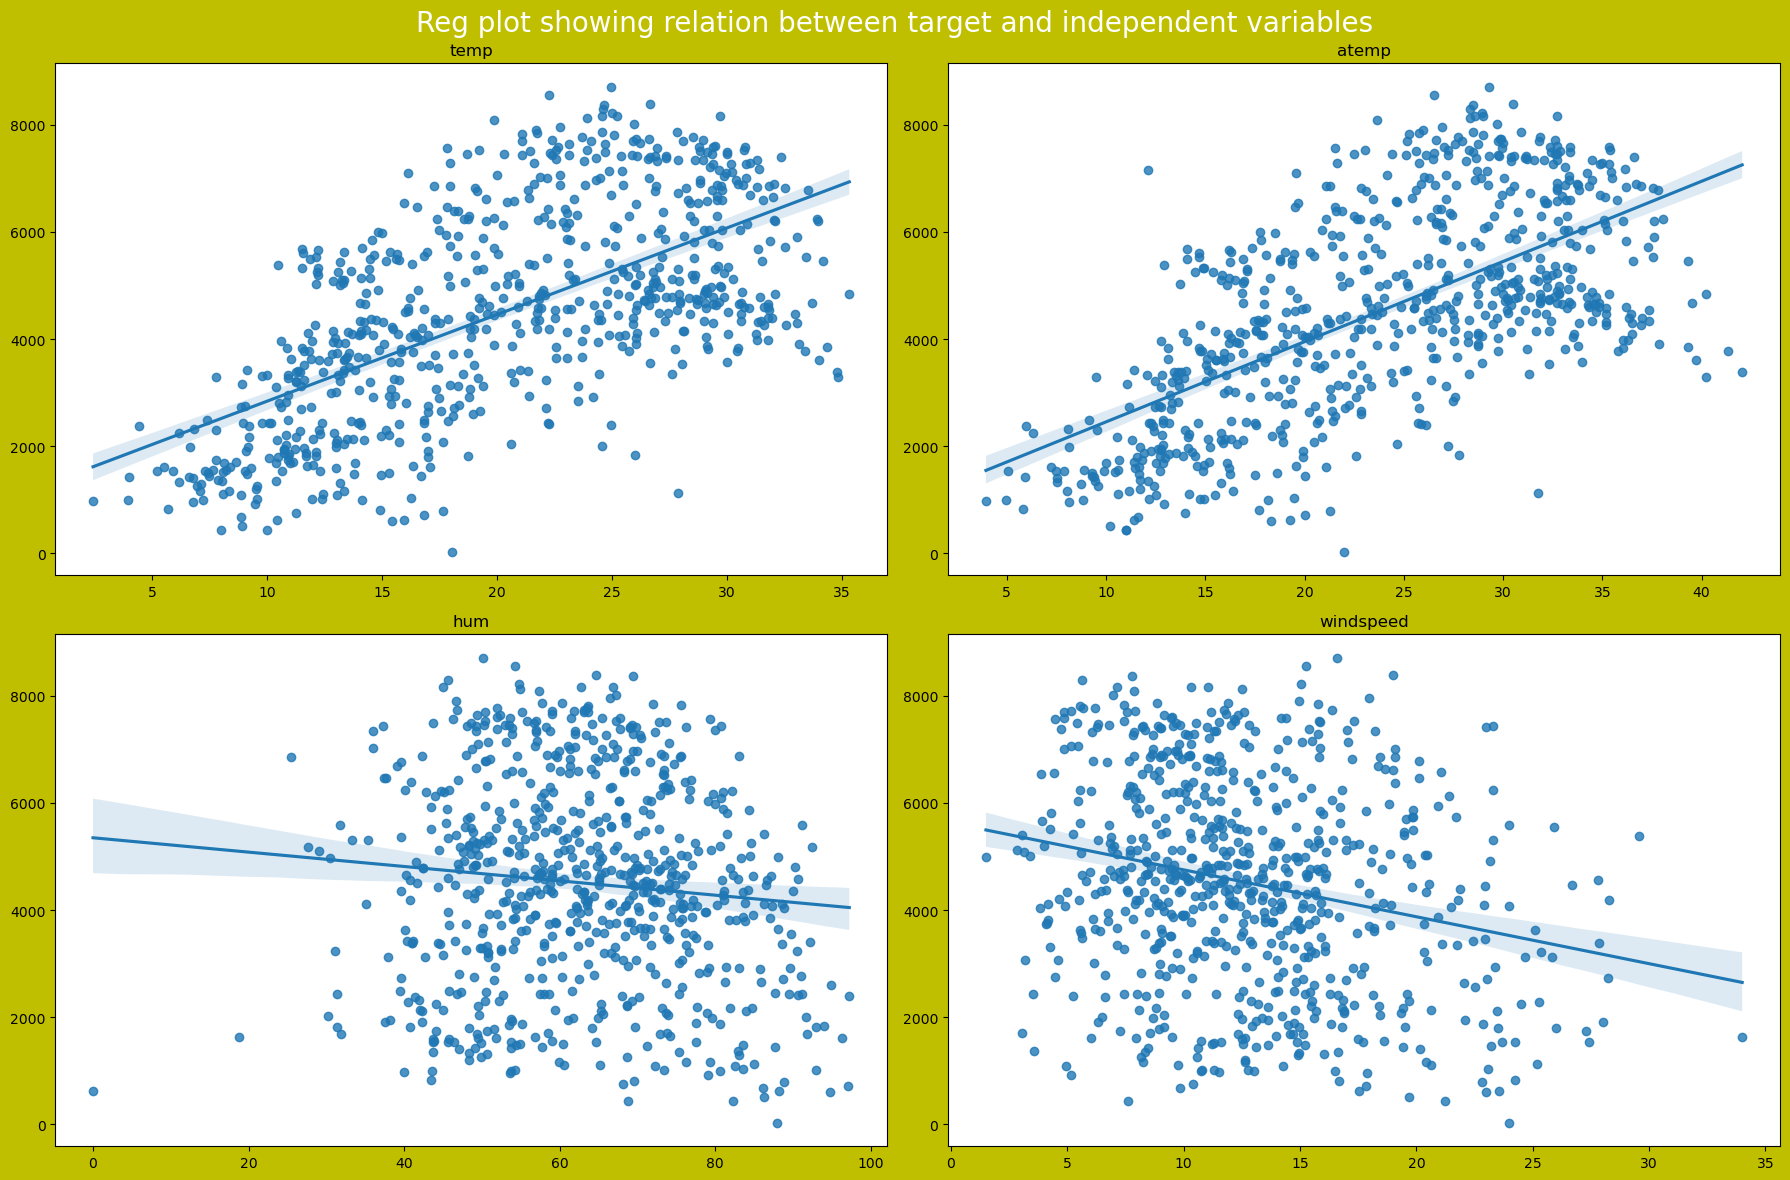

In [22]:
#Ploting Continous variables against target
subplot_rows = 2
subplot_cols = int(len(numerical_columns_in_data)/2)
fig, ax = plt.subplots(nrows= subplot_rows, ncols = subplot_cols, figsize=(18, 12), facecolor='y')

fig.suptitle('Reg plot showing relation between target and independent variables', fontsize=20, color='w')

#Creating regplot for each column
k=0
for i in range(subplot_rows):
    for j in range(subplot_cols):
        sns.regplot(data=bikes_demand_df, y='cnt', x=numerical_columns_in_data[k], ax=ax[i,j])
        ax[i,j].set_title(numerical_columns_in_data[k], fontsize=12)
        ax[i,j].set_xlabel('')
        ax[i,j].set_ylabel('')
        k+=1

plt.tight_layout()
plt.show()

#### <font color='green'> Observation from regplots of continous independt variables
- temp and atemp seems to be positively correlated with bike usage
- bike demands seems to be negatively correlated with humidity and windspped

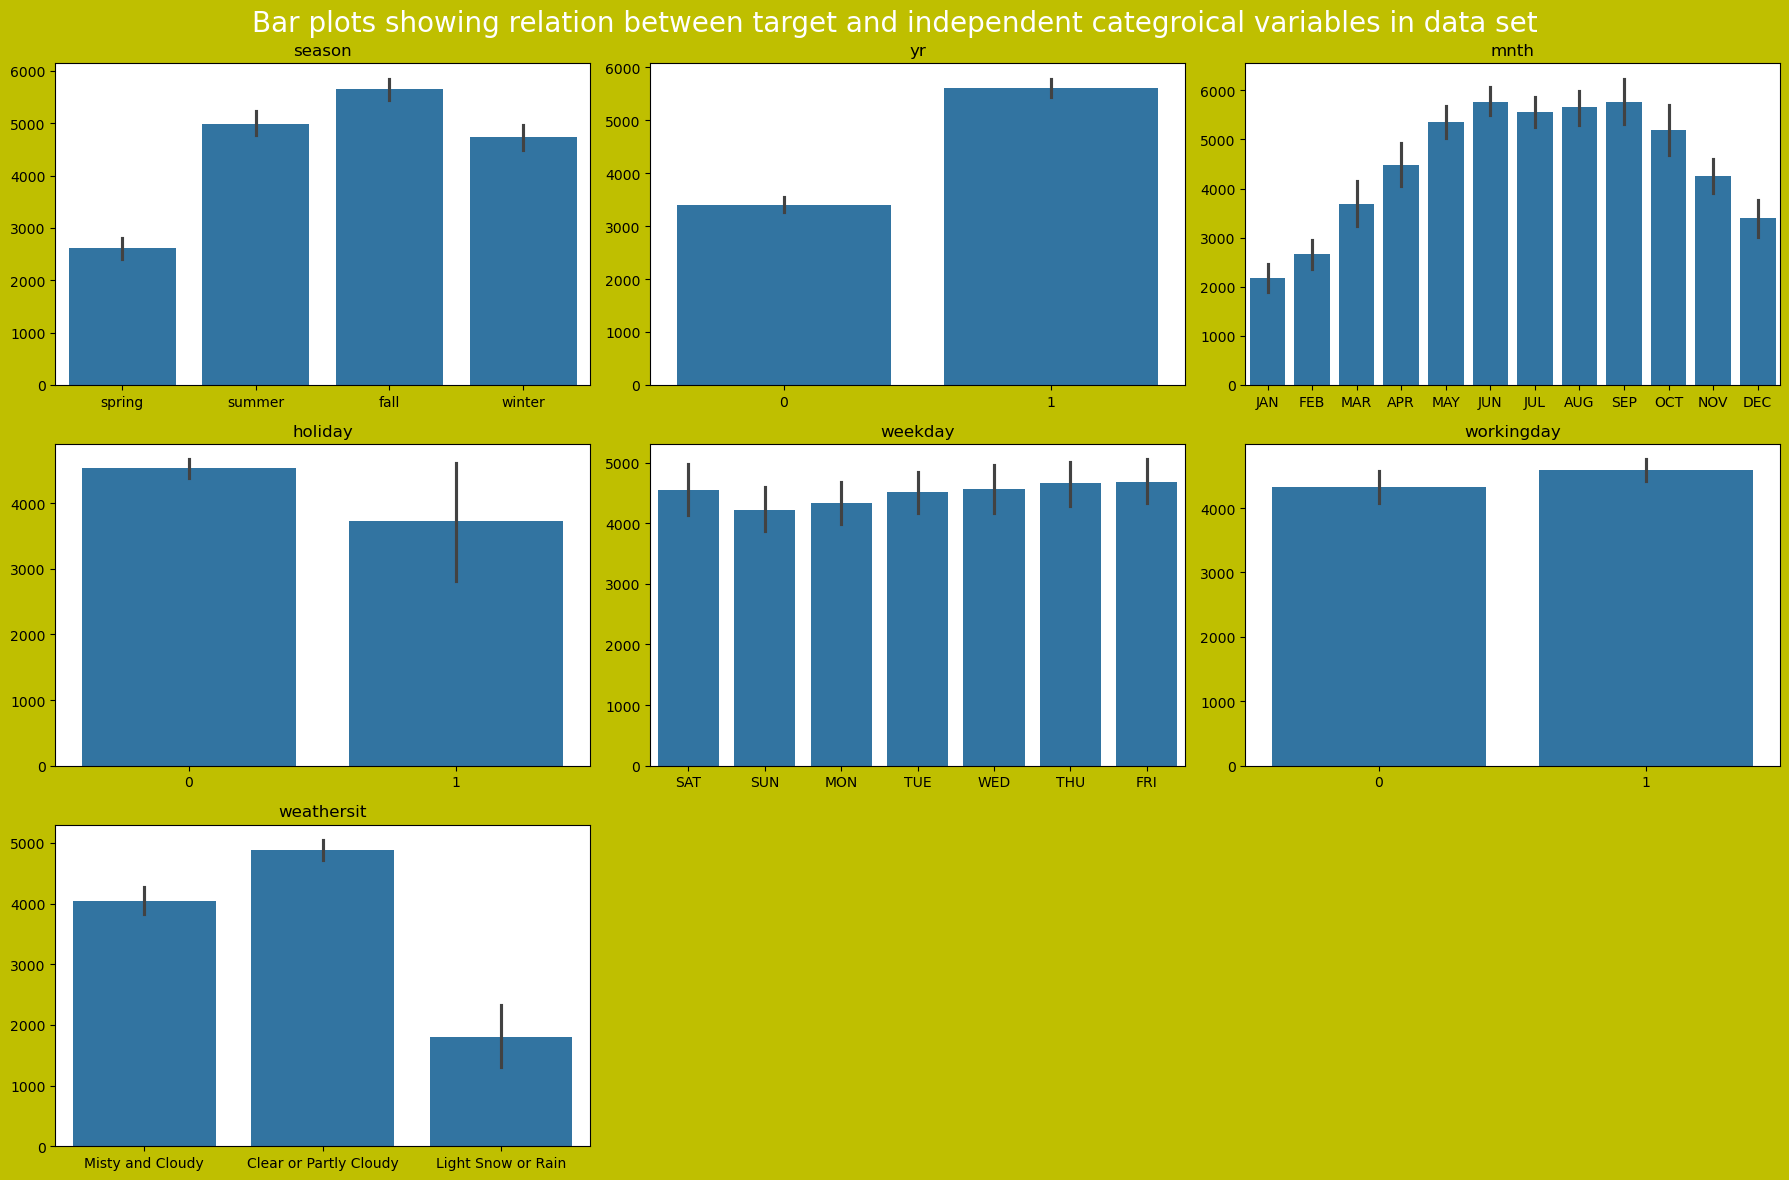

In [23]:
subplot_rows = 3
subplot_cols = int(len(categroical_columns_in_data)/2)
fig, ax = plt.subplots(nrows= subplot_rows, ncols = subplot_cols, figsize=(18, 12), facecolor='y')

fig.suptitle('Bar plots showing relation between target and independent categroical variables in data set', fontsize=20, color='w')

#Creating countplot for each column
k=0
for i in range(subplot_rows):
    for j in range(subplot_cols):
        if i==2 and j>0:
            plt.delaxes(ax[i,j])
        else:
            sns.barplot(data=bikes_demand_df, y='cnt', x=categroical_columns_in_data[k], ax=ax[i,j])
            ax[i,j].set_title(categroical_columns_in_data[k], fontsize=12)
            ax[i,j].set_xlabel('')
            ax[i,j].set_ylabel('')
            if k < len(categroical_columns_in_data)-1:
                k+=1
    

plt.tight_layout()
plt.show()

#### <font color='green'> Observation from barplots of categorical independent variables against target variabl
- month of July and September seems to have high bike demands
- bike demands seems to be negatively correlated with humidity and windspped
- bike demands were high in 2019
- weekdays seems to have similar bike demands except on Sunday and Monday
- non-working days seems to have higher bike demands
- bike demans are high in clear or partly cloud weather sitiuation

### 2.3 Multivariate Analysis

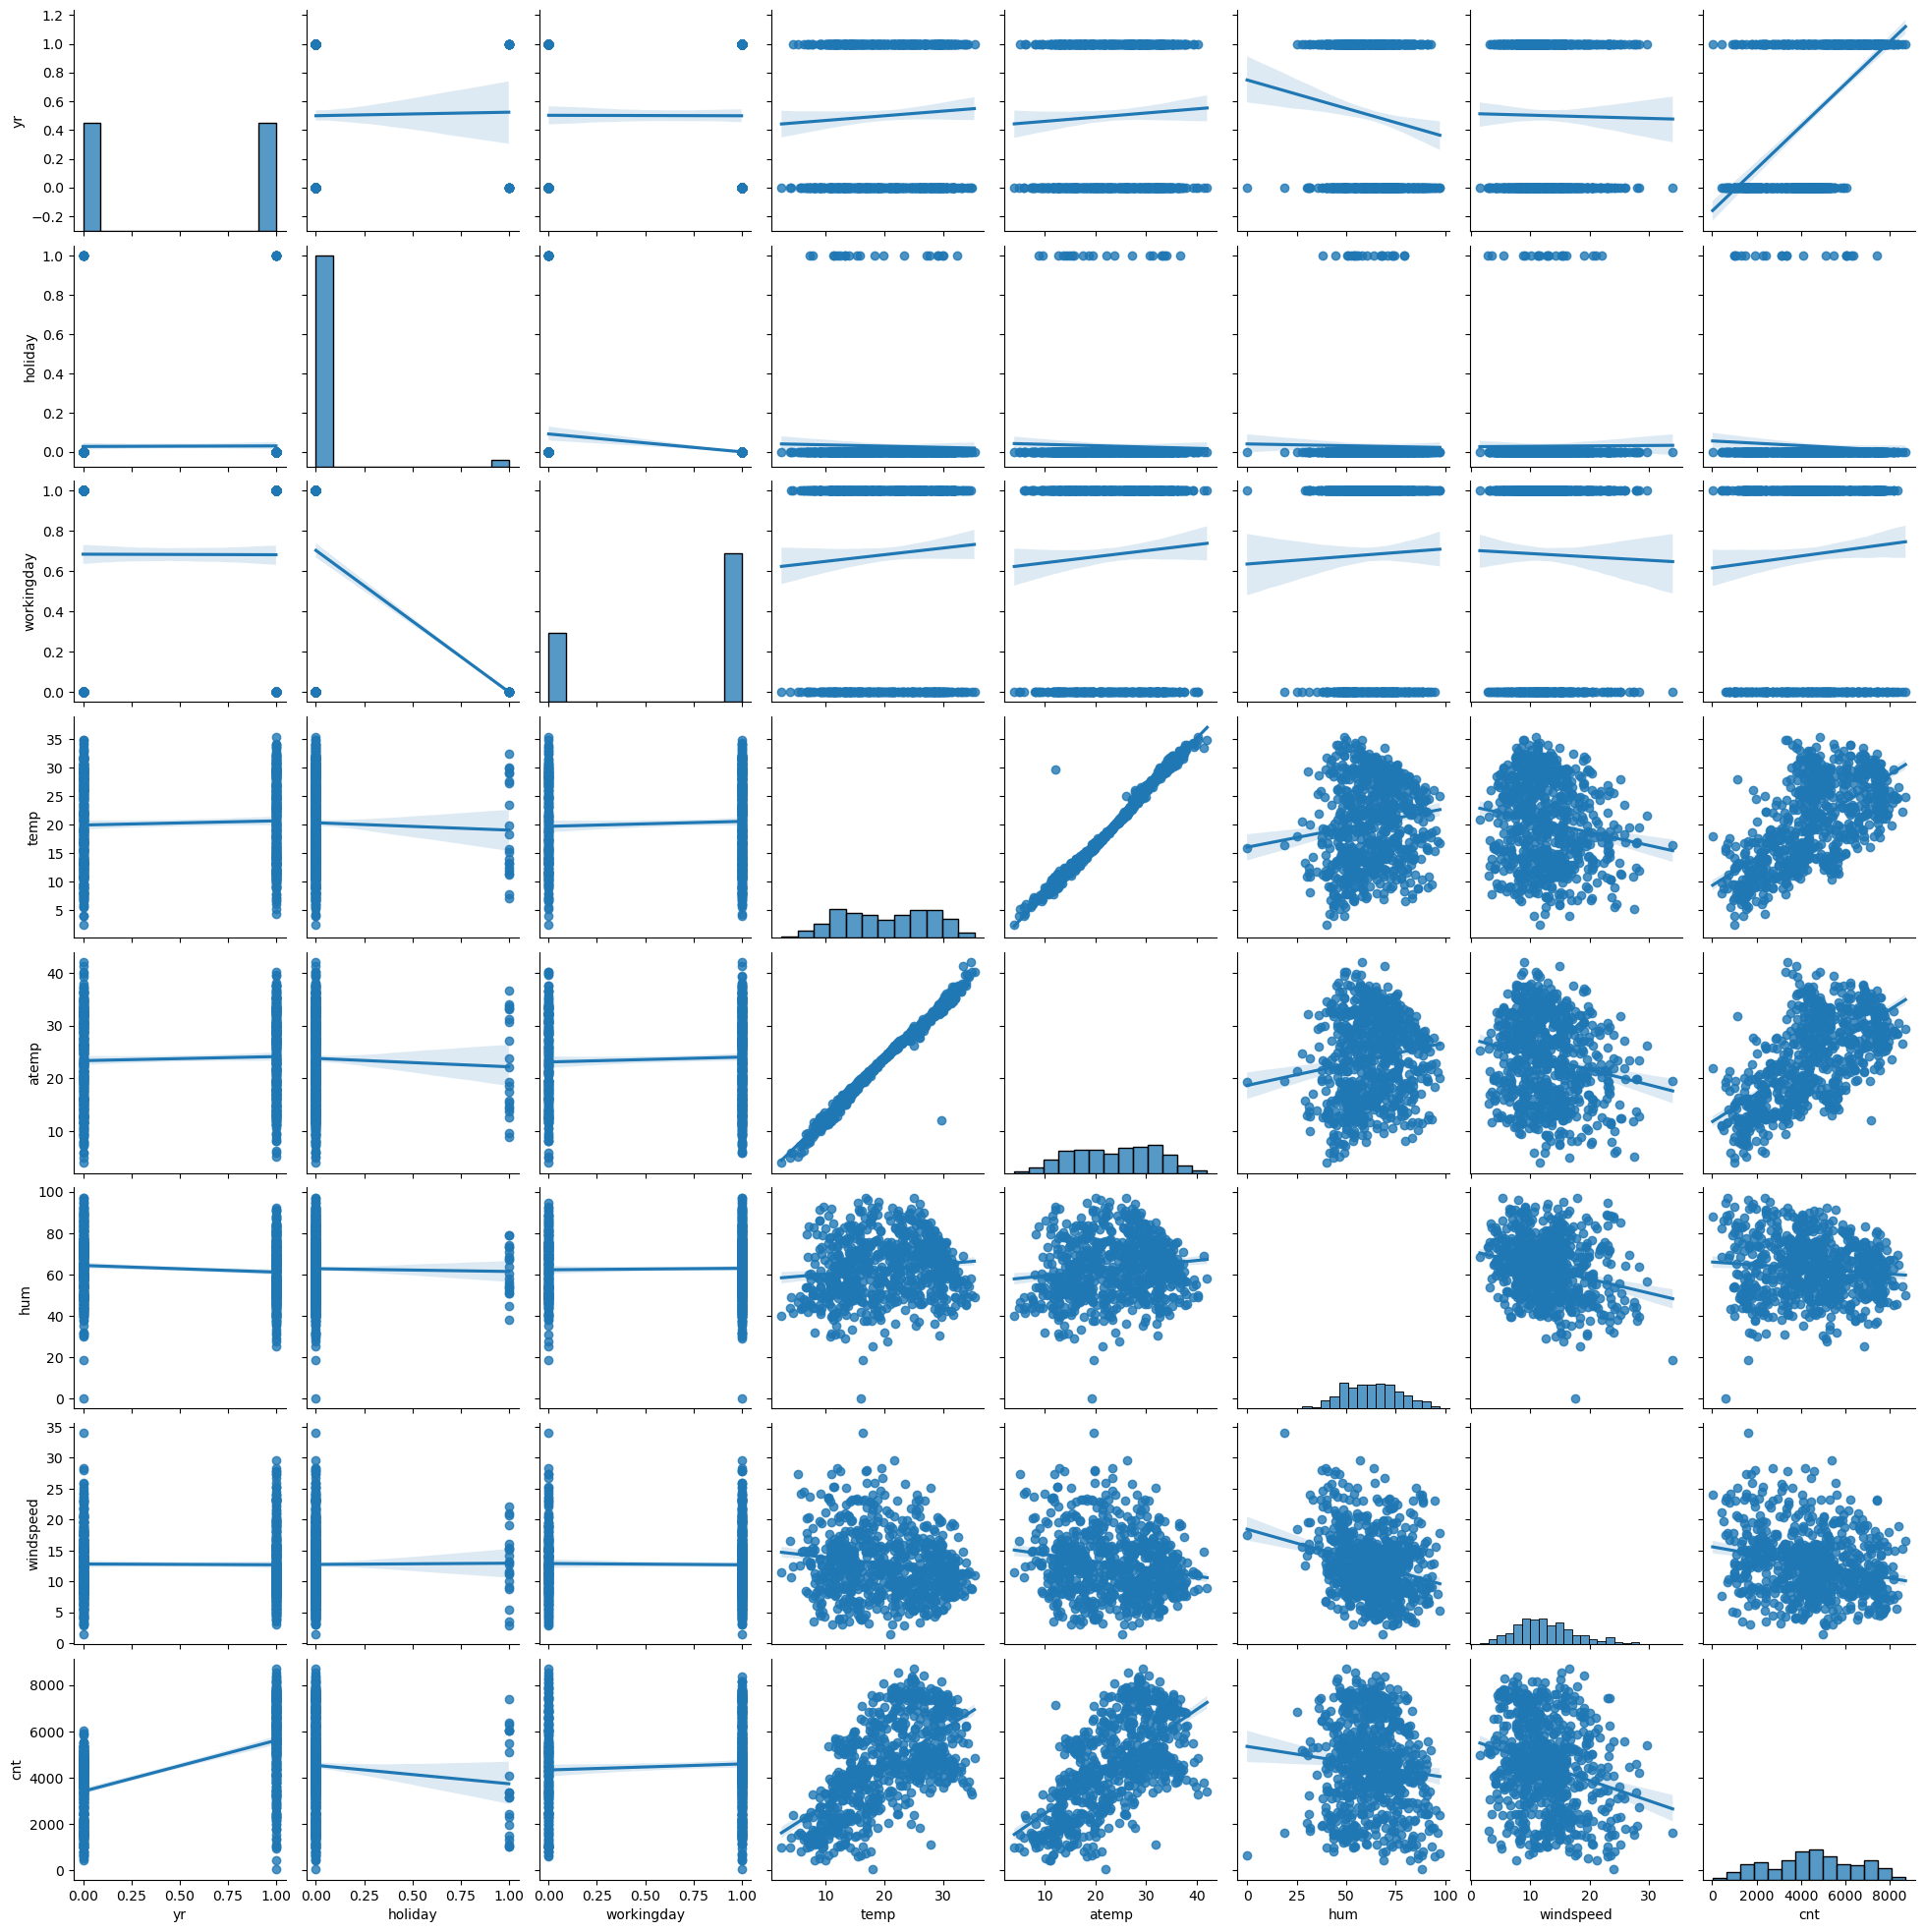

In [24]:
sns.pairplot(bikes_demand_df, kind='reg')
plt.show()

#### <font color='green'> Observations from scatter plot matrix </font>
- cnt is directly proportional to temp and atemp
- cnt is inversely proportional to hum and windspeed
- windspeed seems to be related with temp, atemp, hum
- humidity seems to be related with temp, atemp and windspeed

In [25]:
bikes_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


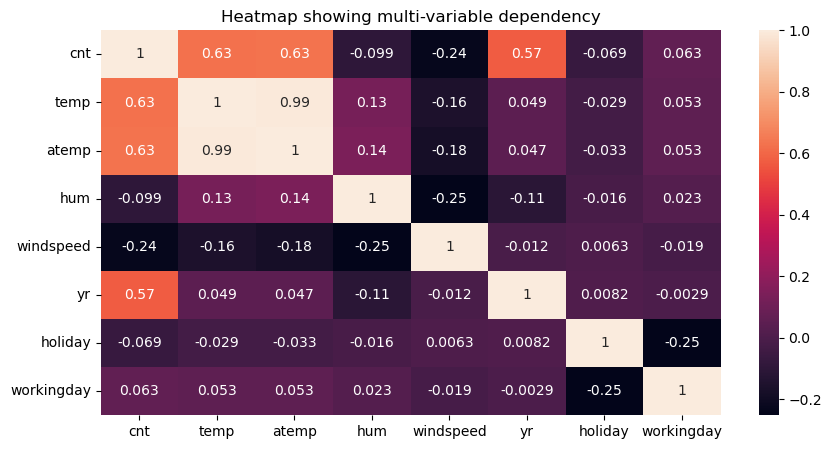

In [26]:
#creating heatmap for continuous independent variables 
bike_demand_df_cm= bikes_demand_df[['cnt', 'temp','atemp','hum','windspeed', 'yr', 'holiday', 'workingday']]
plt.figure(figsize=(10,5))
sns.heatmap(bike_demand_df_cm.corr(), annot = True)
plt.title('Heatmap showing multi-variable dependency')
plt.show()

#### <font color='Green'> Observations from heatmap
- heatmap also shows positive correlation between cnt and temp & atemp
- heatmap also shows negative correlation between windspeed and holiday

### Step 3: Data prepartion for modeling

In [27]:
bikes_demand_df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,JAN,0,SAT,0,Misty and Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,JAN,0,SUN,0,Misty and Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,JAN,0,MON,1,Clear or Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,JAN,0,TUE,1,Clear or Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,JAN,0,WED,1,Clear or Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,JAN,0,THU,1,Clear or Partly Cloudy,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,JAN,0,FRI,1,Misty and Cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,JAN,0,SAT,0,Misty and Cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,JAN,0,SUN,0,Clear or Partly Cloudy,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,JAN,0,MON,1,Clear or Partly Cloudy,6.184153,7.54440,48.2917,14.958889,1321


#### There are non-numerical values in dataset. We need to convert them to numerical values. We will start with dummy variable creation

### 3.1 Creating Dummy Variables

In [28]:
bikes_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [29]:
#creating dummy variable for seasons and concateneting to exisitng data frame
nseasons=pd.get_dummies(bikes_demand_df['season'], drop_first=True, dtype=int)
bikes_demand_df = pd.concat([bikes_demand_df, nseasons], axis=1)

In [30]:
#creating dummy variable for mnth and concateneting to exisitng data frame
nmonths=pd.get_dummies(bikes_demand_df['mnth'], drop_first=True, dtype=int)
bikes_demand_df = pd.concat([bikes_demand_df, nmonths], axis=1)

In [31]:
#creating dummy variable for weekday and concateneting to exisitng data frame
nweekday=pd.get_dummies(bikes_demand_df['weekday'], drop_first=True, dtype=int)
bikes_demand_df = pd.concat([bikes_demand_df, nweekday], axis=1)

In [32]:
#creating dummy variable for weathersit and concateneting to exisitng data frame
nweathersit=pd.get_dummies(bikes_demand_df['weathersit'], drop_first=True, dtype=int)
bikes_demand_df = pd.concat([bikes_demand_df, nweathersit], axis=1)

In [33]:
bikes_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              730 non-null    object 
 1   yr                  730 non-null    int64  
 2   mnth                730 non-null    object 
 3   holiday             730 non-null    int64  
 4   weekday             730 non-null    object 
 5   workingday          730 non-null    int64  
 6   weathersit          730 non-null    object 
 7   temp                730 non-null    float64
 8   atemp               730 non-null    float64
 9   hum                 730 non-null    float64
 10  windspeed           730 non-null    float64
 11  cnt                 730 non-null    int64  
 12  spring              730 non-null    int32  
 13  summer              730 non-null    int32  
 14  winter              730 non-null    int32  
 15  AUG                 730 non-null    int32  
 16  DEC     

In [34]:
ctg_columns_to_drop = ['season', 'mnth', 'weekday', 'weathersit']
bikes_demand_df = bikes_demand_df.drop(ctg_columns_to_drop, axis=1)

In [35]:
bikes_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   yr                  730 non-null    int64  
 1   holiday             730 non-null    int64  
 2   workingday          730 non-null    int64  
 3   temp                730 non-null    float64
 4   atemp               730 non-null    float64
 5   hum                 730 non-null    float64
 6   windspeed           730 non-null    float64
 7   cnt                 730 non-null    int64  
 8   spring              730 non-null    int32  
 9   summer              730 non-null    int32  
 10  winter              730 non-null    int32  
 11  AUG                 730 non-null    int32  
 12  DEC                 730 non-null    int32  
 13  FEB                 730 non-null    int32  
 14  JAN                 730 non-null    int32  
 15  JUL                 730 non-null    int32  
 16  JUN     

In [36]:
bikes_demand_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Snow or Rain,Misty and Cloudy
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096,0.028767,0.336986
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359,0.167266,0.473004
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


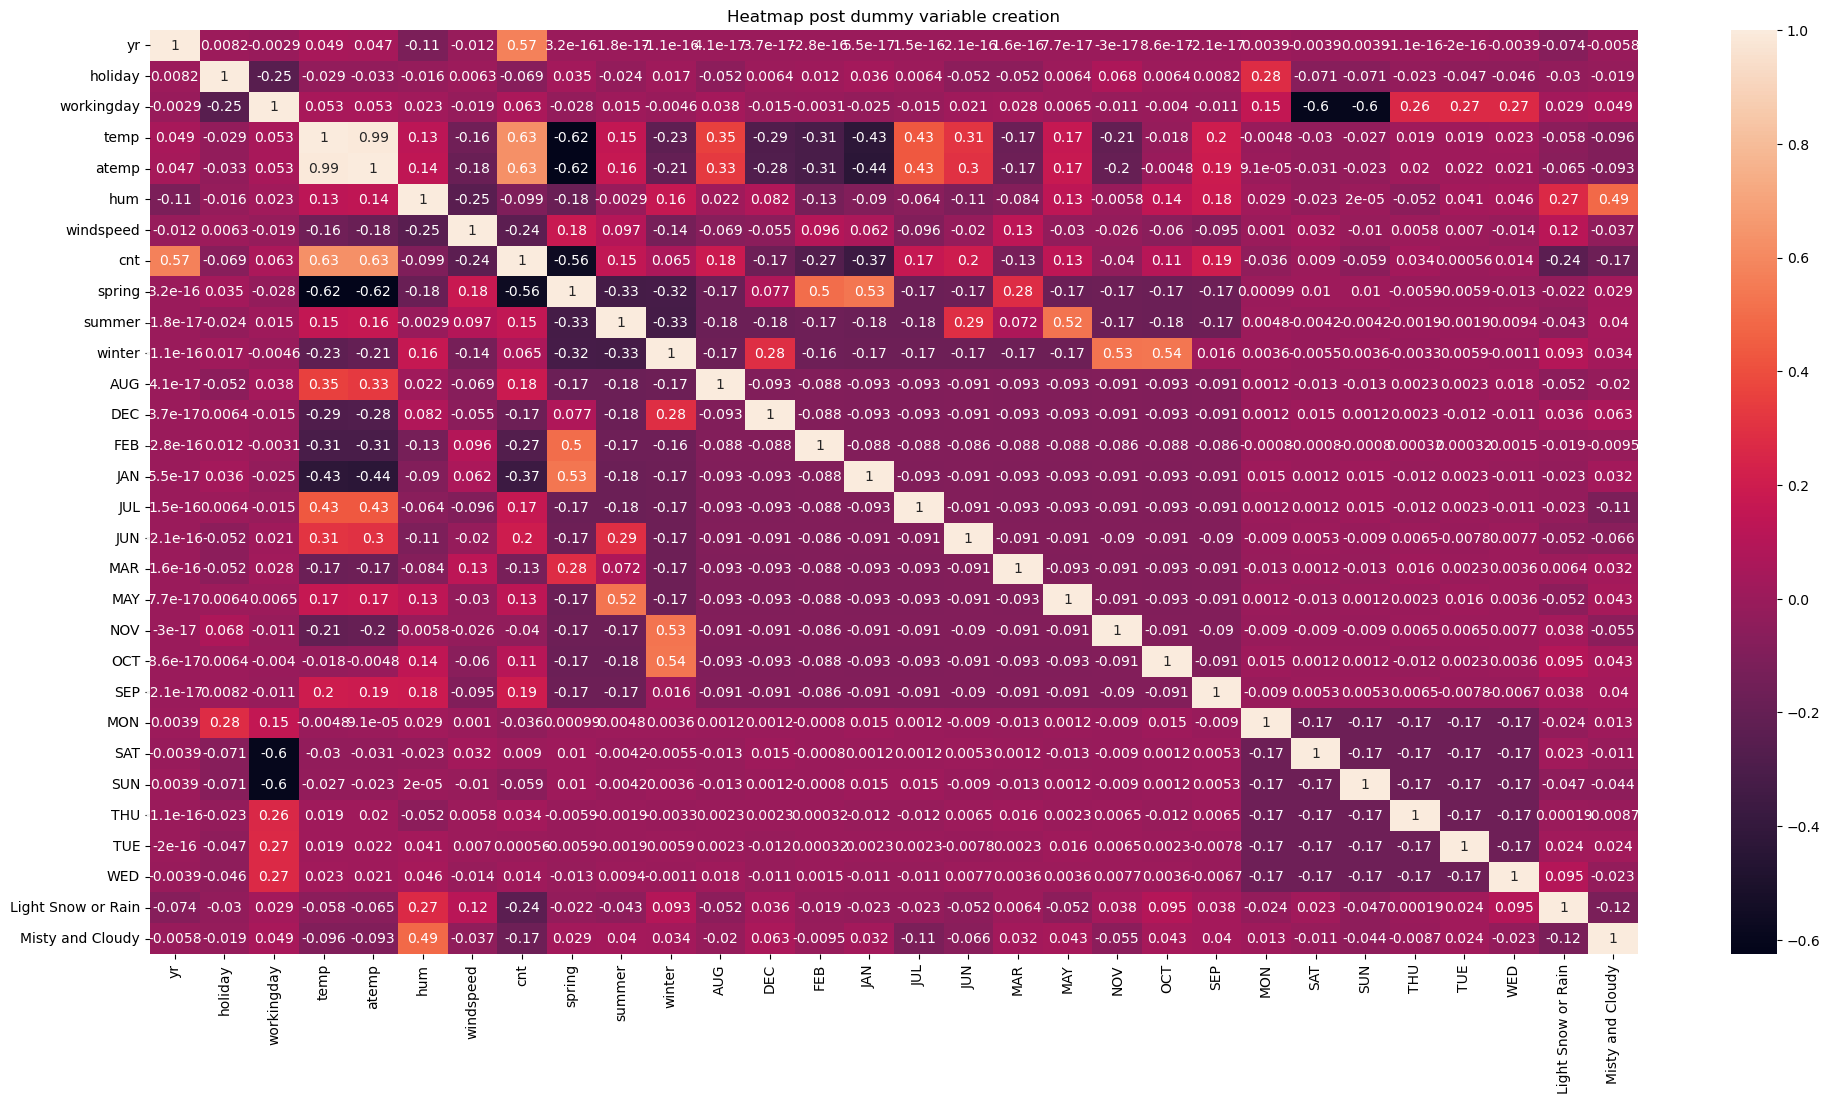

In [37]:
#plotting heatmap again
plt.figure(figsize=(24,12))
plt.title('Heatmap post dummy variable creation')
sns.heatmap(bikes_demand_df.corr(), annot = True)
plt.show()

### 3.2 Test Train Split

In [38]:
import sklearn
from sklearn.model_selection import train_test_split

In [39]:
bikes_train_df, bikes_test_df = train_test_split(bikes_demand_df, train_size=0.7,random_state=100)

In [40]:
print(bikes_train_df.shape)
print(bikes_test_df.shape)

(510, 30)
(220, 30)


### 3.3 Rescaling the data

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler = MinMaxScaler()

In [43]:
scaler_list = [i for i in bikes_train_df.columns if bikes_train_df[i].nunique() > 2 ] 

In [44]:
bikes_train_df[scaler_list] = scaler.fit_transform(bikes_train_df[scaler_list])

In [45]:
bikes_train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Snow or Rain,Misty and Cloudy
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


### 3.4 Removing target variable from training data

In [46]:
y_train=bikes_train_df.pop('cnt')
X_train=bikes_train_df

In [47]:
print(X_train.shape)
print(y_train.shape)

(510, 29)
(510,)


### 3.5 Model Development

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [49]:
#creating instance of linear regression
lm = LinearRegression()
#fitting model with X_train and y_train
lm.fit(X_train, y_train)
#creating RFE instance on fitted lm
rfe = RFE(lm, n_features_to_select=20)
#converting rfe to fitted line
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('AUG', False, 2),
 ('DEC', True, 1),
 ('FEB', True, 1),
 ('JAN', True, 1),
 ('JUL', True, 1),
 ('JUN', False, 9),
 ('MAR', False, 10),
 ('MAY', True, 1),
 ('NOV', True, 1),
 ('OCT', False, 8),
 ('SEP', True, 1),
 ('MON', False, 4),
 ('SAT', True, 1),
 ('SUN', False, 3),
 ('THU', False, 6),
 ('TUE', False, 5),
 ('WED', False, 7),
 ('Light Snow or Rain', True, 1),
 ('Misty and Cloudy', True, 1)]

In [51]:
#dropping cols recommeneded by RFE
cols = X_train.columns[rfe.support_]
cols
X_train_rfe = X_train[cols]

In [52]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
#defining function to calculate VIF value for dataframe
def vif_table(dataframe):
    #init a dataframe
    vif = pd.DataFrame()
    #Adding feature names
    vif['Features'] = dataframe.columns
    #Adding feature VIF values
    vif['VIF Value'] = [round(variance_inflation_factor(dataframe.values,i),2) for i in range(len(dataframe.columns))]
    #Sorting Data frame
    vif = vif.sort_values(by = 'VIF Value', ascending = False)
    #output
    return vif

In [54]:
#defining funtion to use statsmodel to get summary
def model_ols(y_dataframe, X_dataframe):
    #Adding constant
    X_dataframe = sm.add_constant(X_dataframe)
    #Creating linear regression model
    lm = sm.OLS(y_dataframe, X_dataframe).fit()
    #printing summary
    print(lm.summary())

In [55]:
model_ols(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          6.28e-188
Time:                        23:23:37   Log-Likelihood:                 525.41
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2973      0

In [56]:
vif_table(X_train_rfe)

,Features,VIF Value
3,temp,379.77
4,atemp,368.95
5,hum,31.79
7,spring,5.73
2,workingday,5.40
6,windspeed,5.13
9,winter,4.28
8,summer,3.59
12,JAN,2.40
19,Misty and Cloudy,2.33


#### p-value and VIF value of atemp are very high; dropping atemp

In [57]:
X_train_rfe = X_train_rfe.drop('atemp', axis=1)

In [58]:
model_ols(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.20e-189
Time:                        23:23:37   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2970      0

In [59]:
vif_table(X_train_rfe)

,Features,VIF Value
4,hum,31.74
3,temp,19.84
6,spring,5.62
2,workingday,5.40
5,windspeed,4.88
8,winter,4.12
7,summer,3.44
11,JAN,2.40
18,Misty and Cloudy,2.33
0,yr,2.11


#### VIF value of hum is very high; dropping hum

In [60]:
X_train_rfe = X_train_rfe.drop('hum', axis=1)

In [61]:
model_ols(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.51e-186
Time:                        23:23:37   Log-Likelihood:                 516.82
No. Observations:                 510   AIC:                            -995.6
Df Residuals:                     491   BIC:                            -915.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2216      0

In [62]:
vif_table(X_train_rfe)

,Features,VIF Value
3,temp,7.47
2,workingday,5.36
4,windspeed,4.82
5,spring,4.57
7,winter,3.08
6,summer,2.92
10,JAN,2.24
0,yr,2.09
15,SAT,2.00
9,FEB,1.89


#### p value of MAY is very high; dropping MAY

In [63]:
X_train_rfe = X_train_rfe.drop('MAY', axis=1)

In [64]:
model_ols(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.4
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.63e-187
Time:                        23:23:37   Log-Likelihood:                 516.47
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     492   BIC:                            -920.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2170      0

In [65]:
vif_table(X_train_rfe)

,Features,VIF Value
3,temp,7.30
2,workingday,5.35
4,windspeed,4.73
5,spring,4.55
7,winter,3.08
6,summer,2.35
10,JAN,2.24
0,yr,2.08
14,SAT,1.99
9,FEB,1.89


#### VIF value of temp is very high; dropping temp

In [66]:
X_train_rfe = X_train_rfe.drop('temp', axis=1)

In [67]:
model_ols(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     127.5
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.79e-163
Time:                        23:23:37   Log-Likelihood:                 456.18
No. Observations:                 510   AIC:                            -878.4
Df Residuals:                     493   BIC:                            -806.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5528      0

In [68]:
vif_table(X_train_rfe)

,Features,VIF Value
4,spring,4.53
3,windspeed,4.31
2,workingday,3.85
6,winter,3.06
5,summer,2.29
9,JAN,2.17
0,yr,1.91
8,FEB,1.86
11,NOV,1.82
13,SAT,1.70


#### p value of winter is very high; dropping winter

In [69]:
X_train_rfe = X_train_rfe.drop('winter', axis=1)

In [70]:
model_ols(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.98e-164
Time:                        23:23:37   Log-Likelihood:                 455.90
No. Observations:                 510   AIC:                            -879.8
Df Residuals:                     494   BIC:                            -812.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5470      0

In [71]:
vif_table(X_train_rfe)

,Features,VIF Value
3,windspeed,4.09
4,spring,3.78
2,workingday,3.64
8,JAN,2.14
5,summer,1.96
0,yr,1.89
7,FEB,1.84
12,SAT,1.64
14,Misty and Cloudy,1.55
10,NOV,1.32


#### p-value of JUL is very high; dropping JUL

In [72]:
X_train_rfe = X_train_rfe.drop('JUL', axis=1)

In [73]:
model_ols(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     145.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.88e-165
Time:                        23:23:37   Log-Likelihood:                 455.73
No. Observations:                 510   AIC:                            -881.5
Df Residuals:                     495   BIC:                            -817.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5440      0

In [74]:
vif_table(X_train_rfe)

,Features,VIF Value
3,windspeed,4.00
4,spring,3.66
2,workingday,3.44
8,JAN,2.14
0,yr,1.88
7,FEB,1.84
5,summer,1.80
11,SAT,1.60
13,Misty and Cloudy,1.54
9,NOV,1.27


#### p-value of holiday is very high; dropping holiday

In [75]:
X_train_rfe = X_train_rfe.drop('holiday', axis=1)

In [76]:
model_ols(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     156.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.89e-166
Time:                        23:23:37   Log-Likelihood:                 455.03
No. Observations:                 510   AIC:                            -882.1
Df Residuals:                     496   BIC:                            -822.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5394      0

In [77]:
vif_table(X_train_rfe)

,Features,VIF Value
2,windspeed,3.92
3,spring,3.66
1,workingday,3.21
7,JAN,2.13
0,yr,1.87
6,FEB,1.84
4,summer,1.79
10,SAT,1.54
12,Misty and Cloudy,1.54
8,NOV,1.22


### 3.6 Residual Analysis

In [78]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     156.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.89e-166
Time:                        23:23:37   Log-Likelihood:                 455.03
No. Observations:                 510   AIC:                            -882.1
Df Residuals:                     496   BIC:                            -822.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5394      0

In [79]:
y_train_pred=lm.predict(X_train_rfe)

In [80]:
y_train_pred

576    0.789168
426    0.516771
728    0.328696
482    0.682592
111    0.391823
         ...   
578    0.804163
53     0.277732
350    0.296859
79     0.363031
520    0.641740
Length: 510, dtype: float64

In [81]:
res = y_train - y_train_pred

<Axes: ylabel='Density'>

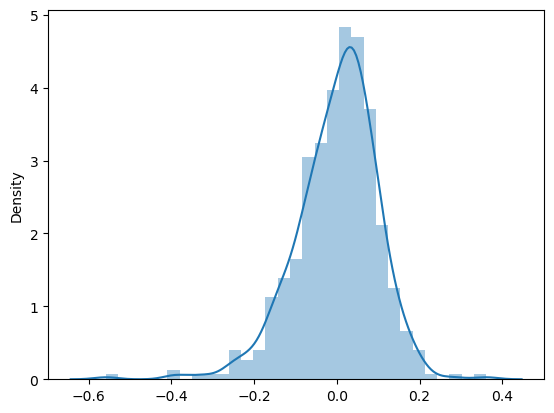

In [82]:
sns.distplot(res)

#### Observation from residuals distplot
- residuals are normally distributed
- residuals are centered around 0

In [83]:
bikes_test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Snow or Rain,Misty and Cloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [84]:
caler = MinMaxScaler()

In [85]:
scaler_list = [i for i in bikes_test_df.columns if bikes_test_df[i].nunique() > 2 ] 

In [86]:
bikes_test_df[scaler_list] = scaler.transform(bikes_test_df[scaler_list])

In [87]:
bikes_test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,OCT,SEP,MON,SAT,SUN,THU,TUE,WED,Light Snow or Rain,Misty and Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [88]:
y_test=bikes_test_df.pop('cnt')
X_test=bikes_test_df

In [90]:
#following columns  will be dropped from test set as well
cols_to_drop_from_test=['holiday', 'JUL', 'winter', 'temp', 'MAY', 'hum', 'atemp', 'AUG', 'JUN', 'MAR', 'OCT', 'MON', 'SUN', 'THU', 'TUE', 'WED']
X_test = X_test.drop(cols_to_drop_from_test, axis=1)

In [95]:
X_test = sm.add_constant(X_test)
y_test_predict = lm.predict(X_test)

In [96]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_predict)

0.7935537378328231

In [ ]:
#Equation for regression
bike_demand =  0.5394 + 0.2458 * yr + 0.0551 * workingday - 0.1934 * windspeed - 0.1941 * spring - 0.0413 * summer - 0.1341* DEC - 0.1012 * FEB - 0.1695 * JAN - 0.1151 * NOV + 0.0534 * SEP + 0.0629 * SAT - 0.3191 * (Light Snow or Rain) - 0.0878 * (Misty and Cloudy)

#### Final Observation
- r2_score of training set was 0.804
- r2_score of test set was 0.794
- since variation between r2_score of test and training data is very less, model can be used for generalization
- if all variables arew kept 0, still there will be a demand of 0.539 units
- if all other factors are kept constant, demand per year will increase by .0551 units